In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Display plots in the notebook
%matplotlib inline


In [4]:
df = pd.read_csv("C:/Users/ASUS/Downloads/sentimentdataset.csv", encoding="ISO-8859-1")

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [7]:
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [11]:
df.describe()

,unnamed:_0.1,unnamed:_0,retweets,likes,year,month,day,hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [12]:
df.isnull().sum()

unnamed:_0.1    0
unnamed:_0      0
text            0
sentiment       0
timestamp       0
user            0
platform        0
hashtags        0
retweets        0
likes           0
country         0
year            0
month           0
day             0
hour            0
dtype: int64

In [13]:
df.head()

,unnamed:_0.1,unnamed:_0,text,sentiment,timestamp,user,platform,hashtags,retweets,likes,country,year,month,day,hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! ðª ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [14]:
df[['likes', 'retweets']].describe()

,likes,retweets
count,732.000000,732.000000
mean,42.901639,21.508197
std,14.089848,7.061286
min,10.000000,5.000000
25%,34.750000,17.750000
50%,43.000000,22.000000
75%,50.000000,25.000000
max,80.000000,40.000000


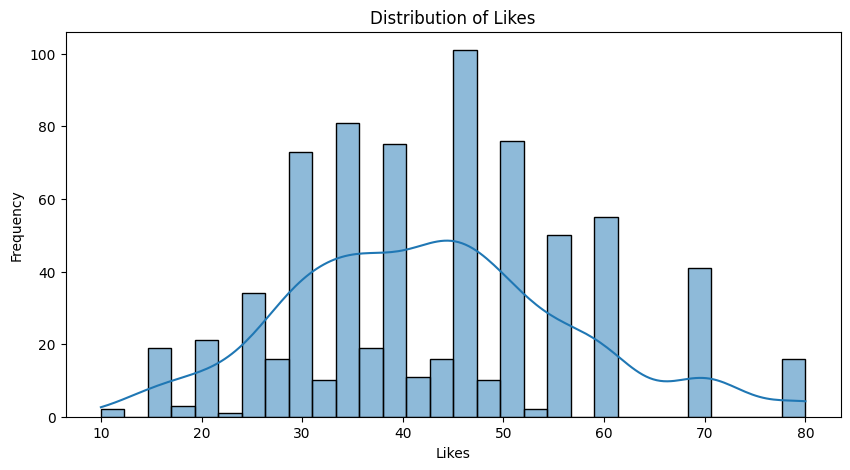

Text(0.5, 0, 'Retweets')

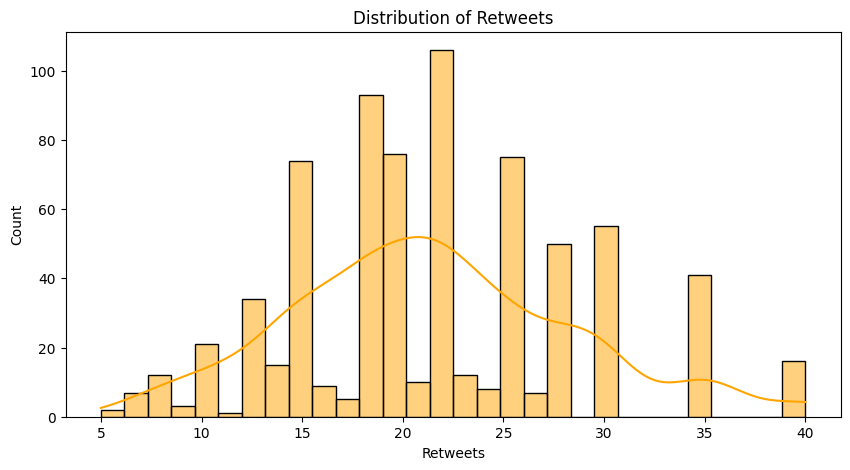

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['likes'], bins=30, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['retweets'], bins=30, kde=True, color='orange')
plt.title("Distribution of Retweets")
plt.xlabel("Retweets")

<Figure size 1000x500 with 0 Axes>

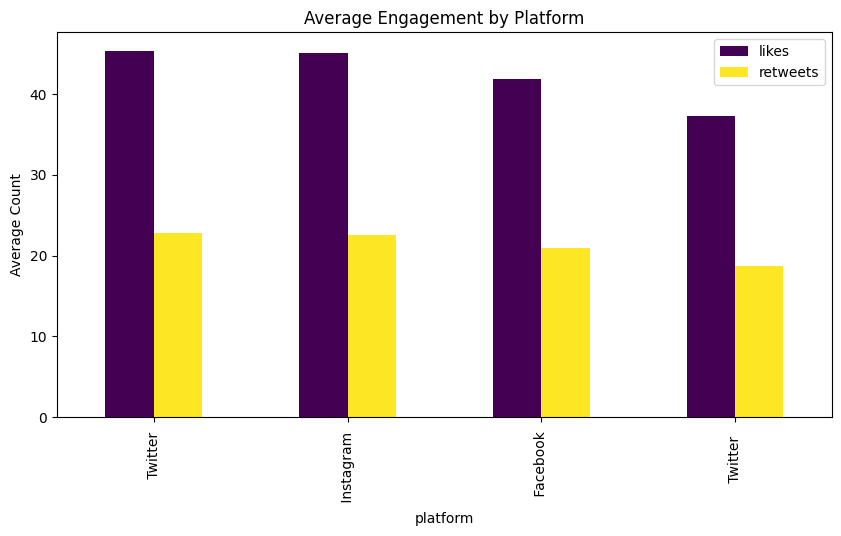

In [16]:
platform_engagement = df.groupby('platform')[['likes', 'retweets']].mean().sort_values(by='likes', ascending=False)

plt.figure(figsize=(10,5))
platform_engagement.plot(kind='bar', figsize=(10,5), colormap='viridis')
plt.title("Average Engagement by Platform")
plt.ylabel("Average Count")
plt.show()


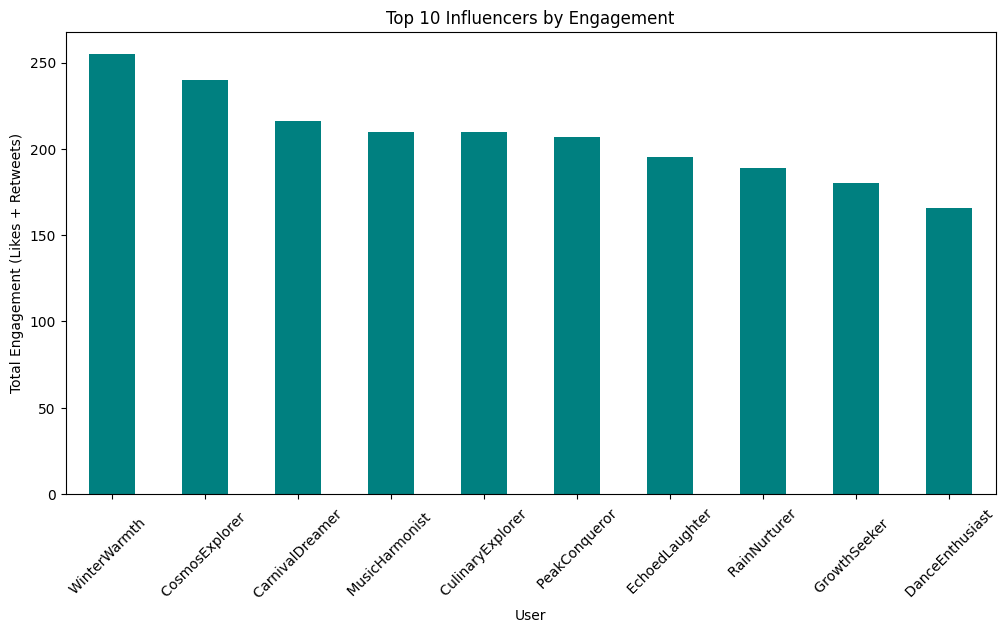

In [17]:
df['total_engagement'] = df['likes'] + df['retweets']

top_users = df.groupby('user')['total_engagement'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_users.plot(kind='bar', color='teal')
plt.title("Top 10 Influencers by Engagement")
plt.xlabel("User")
plt.ylabel("Total Engagement (Likes + Retweets)")
plt.xticks(rotation=45)
plt.show()


In [47]:
df = pd.read_csv("sentimentdataset.csv")
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


<Figure size 1200x600 with 0 Axes>

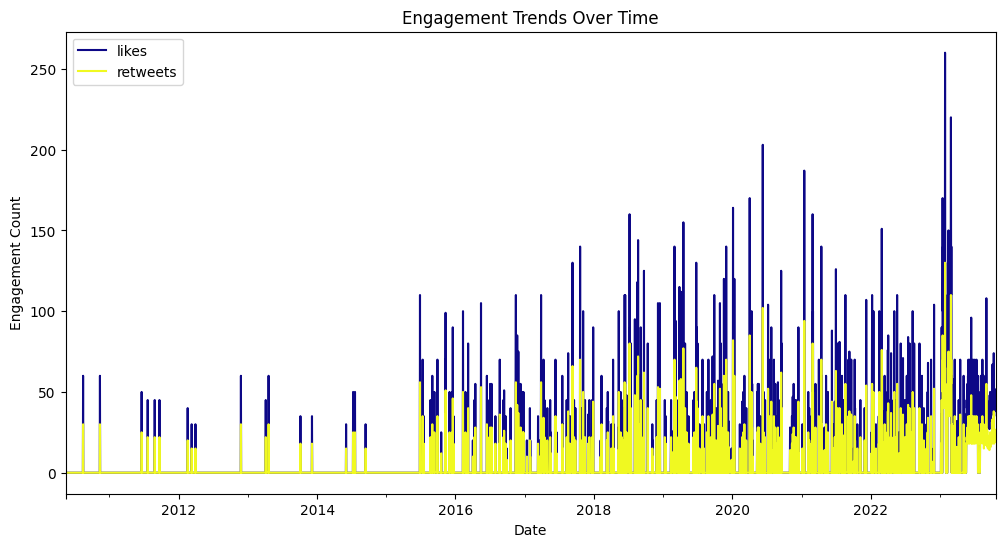

In [56]:
daily_engagement = df.resample('D')[['likes', 'retweets']].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
daily_engagement.plot(figsize=(12,6), colormap='plasma')
plt.title("Engagement Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement Count")
plt.show()


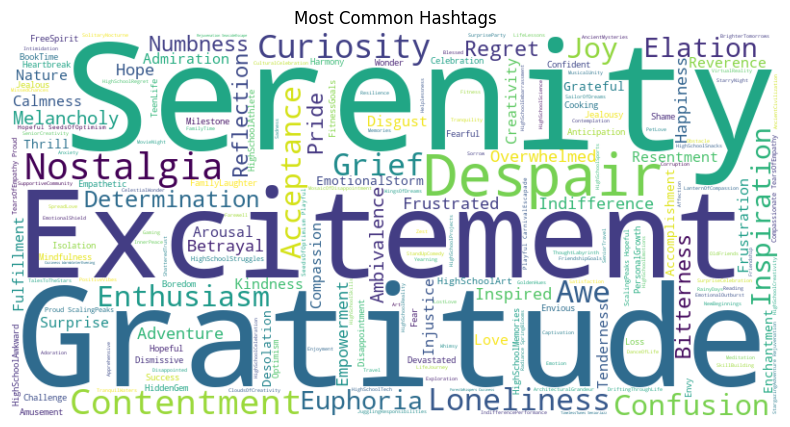

In [59]:
from collections import Counter
from wordcloud import WordCloud

hashtags = df['Hashtags'].str.split().dropna()
hashtags = [tag for sublist in hashtags for tag in sublist]

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(hashtags))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Hashtags")
plt.show()
